In [1]:
'''importing necessary libraries'''

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
'''mnist data set'''

mnist = input_data.read_data_sets("MNIST_DATA/", one_hot=True)

In [4]:
# setting the default graph

tf.reset_default_graph()

In [6]:
# number of units in each layer

n_input = 784
n_hidden1 = 392
n_hidden2 = 196
n_hidden3 = n_hidden1
n_output = n_input
learn_rate = 0.01

In [7]:
# activation function

actiavtion_function = tf.nn.relu

In [9]:
''' Stacked Auto Encoder Architecture '''

x =tf.placeholder(tf.float32,shape=[None,n_input])
init = tf.variance_scaling_initializer() #can addapt ist scale to the shape of tenors

w1 = tf.Variable(init([n_input,n_hidden1]), dtype=tf.float32)
w2 = tf.Variable(init([n_hidden1,n_hidden2]), dtype=tf.float32)
w3 = tf.Variable(init([n_hidden2,n_hidden3]), dtype=tf.float32)
w4 = tf.Variable(init([n_hidden3,n_output]), dtype=tf.float32)


b1 = tf.Variable(tf.zeros(n_hidden1))
b2 = tf.Variable(tf.zeros(n_hidden2))
b3 = tf.Variable(tf.zeros(n_hidden3))
b4 = tf.Variable(tf.zeros(n_output))


h1 = actiavtion_function(tf.matmul(x,w1)+b1)
h2 = actiavtion_function(tf.matmul(h1,w2)+b2)
h3 = actiavtion_function(tf.matmul(h2,w3)+b3)
output = actiavtion_function(tf.matmul(h3,w4)+b4)

In [10]:
'''optimization'''

loss = tf.reduce_mean(tf.square(output-x))
optimize = tf.train.AdamOptimizer(learning_rate=learn_rate)
train = optimize.minimize(loss)

In [11]:
saver = tf.train.Saver()

In [12]:
'''encoding and decoding session'''

n_epoch = 5
batch_size=150


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(n_epoch):
        n_batch = mnist.train.num_examples//batch_size
        for i in range(100):
            xb,yb= mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={x:xb})
        train_loss = loss.eval(feed_dict={x:xb})
        print('epoch {0} loss {1}'.format(epoch, train_loss))
        
    saver.save(sess,"./check_point/stacked_auto_encoder.ckpt")

epoch 0 loss 0.042887069284915924
epoch 1 loss 0.03521721810102463
epoch 2 loss 0.033063389360904694
epoch 3 loss 0.03149286285042763
epoch 4 loss 0.03212369233369827


In [15]:
'''retreiving the saved model'''

n_test_images=10
with tf.Session() as sess:
    saver.restore(sess,"./check_point/stacked_auto_encoder.ckpt")
    res = output.eval(feed_dict={x:mnist.test.images[:n_test_images]}) # can also evaluate the midden layers

INFO:tensorflow:Restoring parameters from ./check_point/stacked_auto_encoder.ckpt


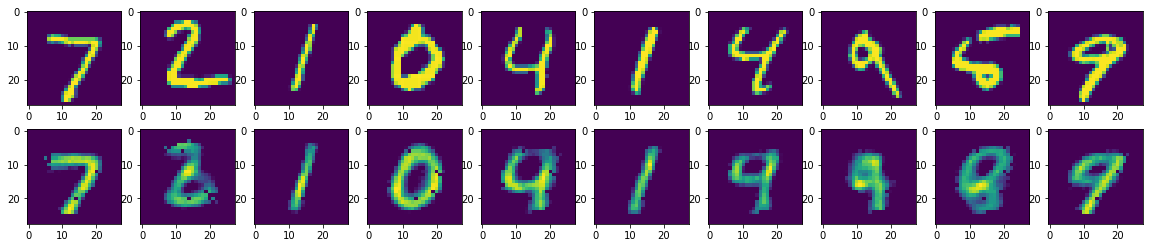

In [16]:
'''regenerated images'''

f,a = plt.subplots(2,10, figsize=(20,4))
for i in range(n_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(res[i],(28,28)))